### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
for column in application_df.columns:
    print(f"{column}: {application_df[column].nunique()}")

APPLICATION_TYPE: 17
AFFILIATION: 6
CLASSIFICATION: 71
USE_CASE: 5
ORGANIZATION: 4
STATUS: 2
INCOME_AMT: 9
SPECIAL_CONSIDERATIONS: 2
ASK_AMT: 8747
IS_SUCCESSFUL: 2


In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

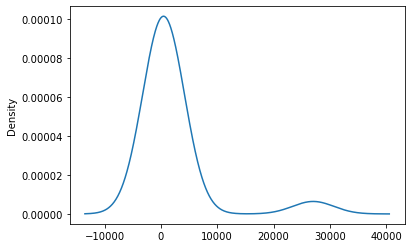

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than 
replace_application = list(application_counts[application_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

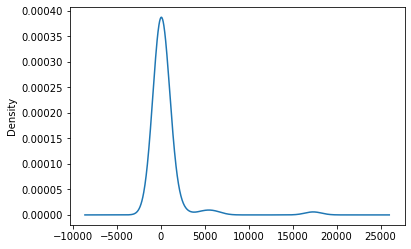

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

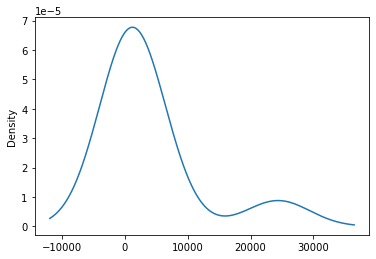

In [10]:
# removing noisy variables
application_df["INCOME_AMT"].value_counts().plot.density()

In [11]:
# removing noisy variables 
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

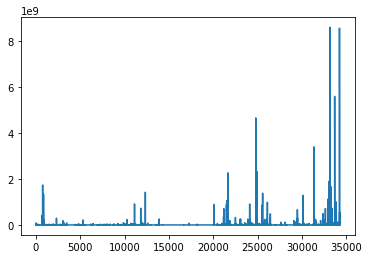

In [12]:
# removing noisy variables 
application_df["ASK_AMT"].plot()
application_df.drop(["ASK_AMT"], axis=1, inplace=True)

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
len(X_train[0])

43

### Deliverable 2: Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=160)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________
Epoch 1/160
804/804 [==============================] - 1s 900us/step - loss: 0.5704 - accuracy: 0.7205
Epoch 2/160
804/804 [==============================] - 1s 878us/step - loss: 0.5552 - accuracy: 0.7293
Epoch 3/160
804/804 [==============================] - 1s 920us/step - loss: 0.5518 - accuracy: 0.7301
Epoch 4

804/804 [==============================] - 1s 811us/step - loss: 0.5357 - accuracy: 0.7406
Epoch 73/160
804/804 [==============================] - 1s 838us/step - loss: 0.5356 - accuracy: 0.7406
Epoch 74/160
804/804 [==============================] - 1s 934us/step - loss: 0.5354 - accuracy: 0.7406
Epoch 75/160
804/804 [==============================] - 1s 939us/step - loss: 0.5354 - accuracy: 0.7411
Epoch 76/160
804/804 [==============================] - 1s 898us/step - loss: 0.5354 - accuracy: 0.7405
Epoch 77/160
804/804 [==============================] - 1s 910us/step - loss: 0.5354 - accuracy: 0.7408
Epoch 78/160
804/804 [==============================] - 1s 864us/step - loss: 0.5355 - accuracy: 0.7415
Epoch 79/160
804/804 [==============================] - 1s 863us/step - loss: 0.5349 - accuracy: 0.7412
Epoch 80/160
804/804 [==============================] - 1s 853us/step - loss: 0.5353 - accuracy: 0.7414
Epoch 81/160
804/804 [==============================] - 1s 851us/step - loss:

804/804 [==============================] - 1s 931us/step - loss: 0.5332 - accuracy: 0.7419
Epoch 151/160
804/804 [==============================] - 1s 917us/step - loss: 0.5334 - accuracy: 0.7416
Epoch 152/160
804/804 [==============================] - 1s 863us/step - loss: 0.5332 - accuracy: 0.7420
Epoch 153/160
804/804 [==============================] - 1s 839us/step - loss: 0.5333 - accuracy: 0.7414
Epoch 154/160
804/804 [==============================] - 1s 905us/step - loss: 0.5331 - accuracy: 0.7419
Epoch 155/160
804/804 [==============================] - 1s 867us/step - loss: 0.5331 - accuracy: 0.7418
Epoch 156/160
804/804 [==============================] - 1s 894us/step - loss: 0.5335 - accuracy: 0.7415
Epoch 157/160
804/804 [==============================] - 1s 843us/step - loss: 0.5332 - accuracy: 0.7415
Epoch 158/160
804/804 [==============================] - 1s 853us/step - loss: 0.5331 - accuracy: 0.7418
Epoch 159/160
804/804 [==============================] - 1s 809us/ste

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=160)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3520      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________
Epoch 1/160
804/804 [==============================] - 1s 1ms/step - loss: 0.6147 - accuracy: 0.6842
Epoch 2/160
804/804 [==============================] - 1s 906us/step - loss: 0.5787 - accuracy: 0.7211
Epoch 3/160
804/804 [==============================] - 1s 1ms/step - loss: 0.5768 - accuracy: 0.7206
Epoch 4/160

Epoch 72/160
804/804 [==============================] - 1s 905us/step - loss: 0.5469 - accuracy: 0.7348
Epoch 73/160
804/804 [==============================] - 1s 894us/step - loss: 0.5469 - accuracy: 0.7343
Epoch 74/160
804/804 [==============================] - 1s 821us/step - loss: 0.5468 - accuracy: 0.7340
Epoch 75/160
804/804 [==============================] - 1s 923us/step - loss: 0.5464 - accuracy: 0.7350
Epoch 76/160
804/804 [==============================] - 1s 825us/step - loss: 0.5465 - accuracy: 0.7346
Epoch 77/160
804/804 [==============================] - 1s 894us/step - loss: 0.5462 - accuracy: 0.7346
Epoch 78/160
804/804 [==============================] - 1s 846us/step - loss: 0.5467 - accuracy: 0.7346
Epoch 79/160
804/804 [==============================] - 1s 974us/step - loss: 0.5462 - accuracy: 0.7350
Epoch 80/160
804/804 [==============================] - 1s 878us/step - loss: 0.5460 - accuracy: 0.7337
Epoch 81/160
804/804 [==============================] - 1s 870us

804/804 [==============================] - 1s 900us/step - loss: 0.5407 - accuracy: 0.7367
Epoch 151/160
804/804 [==============================] - 1s 867us/step - loss: 0.5411 - accuracy: 0.7364
Epoch 152/160
804/804 [==============================] - 1s 844us/step - loss: 0.5408 - accuracy: 0.7377
Epoch 153/160
804/804 [==============================] - 1s 850us/step - loss: 0.5405 - accuracy: 0.7372
Epoch 154/160
804/804 [==============================] - 1s 891us/step - loss: 0.5404 - accuracy: 0.7376
Epoch 155/160
804/804 [==============================] - 1s 936us/step - loss: 0.5406 - accuracy: 0.7365
Epoch 156/160
804/804 [==============================] - 1s 1ms/step - loss: 0.5404 - accuracy: 0.7369
Epoch 157/160
804/804 [==============================] - 1s 878us/step - loss: 0.5404 - accuracy: 0.7368
Epoch 158/160
804/804 [==============================] - 1s 897us/step - loss: 0.5404 - accuracy: 0.7372
Epoch 159/160
804/804 [==============================] - 1s 983us/step 

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 126
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 126)               5544      
                                                                 
 dense_10 (Dense)            (None, 30)                3810      
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,785
Trainable params: 9,785
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)

checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5,
    mode='max'
)

In [27]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200, callbacks=[cp_callback])



Epoch 1/200
  1/804 [..............................] - ETA: 6:53 - loss: 0.6887 - accuracy: 0.5938
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.7286 - accuracy: 0.5144  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 21/804 [..............................] - ETA: 3s - loss: 0.7221 - accuracy: 0.5134
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.7229 - accuracy: 0.4927
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.7181 - accuracy: 0.4891
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 47/804 [>.............................] -

432/804 [===============>..............] - ETA: 1s - loss: 0.6765 - accuracy: 0.5773
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.6745 - accuracy: 0.5809
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6730 - accuracy: 0.5839
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6715 - accuracy: 0.5867
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6693 - accuracy: 0.5908


Epoch 00002: saving model to checkpoints/weights.02.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5915 - accuracy: 0.7160
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5951 - accuracy: 0.7131
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5947 - accuracy: 0.7141
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5922 - accuracy: 0.7169
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model

561/804 [===================>..........] - ETA: 0s - loss: 0.5842 - accuracy: 0.7218
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5844 - accuracy: 0.7218
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5846 - accuracy: 0.7214
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5842 - accuracy: 0.7217
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model


Epoch 00003: saving model to checkpoints/weights.03.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.5803 - accuracy: 0.7240
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.5814 - accuracy: 0.7231
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.5802 - accuracy: 0.7243
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.5798 - accuracy: 0.7244
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model

702/804 [=========================>....] - ETA: 0s - loss: 0.5787 - accuracy: 0.7256
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5779 - accuracy: 0.7260
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5776 - accuracy: 0.7262
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5778 - accuracy: 0.7260
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5704 - accuracy: 0.7330
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5718 - accuracy: 0.7319
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.5728 - accuracy: 0.7309
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5728 - accuracy: 0.7307
Epoch 00004: saving model


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5845 - accuracy: 0.7166
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5807 - accuracy: 0.7225
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5734 - accuracy: 0.7314
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5768 - accuracy: 0.7301
Epoch 00005: saving model


Epoch 00005: saving model to checkpoints/weights.05.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5751 - accuracy: 0.7281
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5752 - accuracy: 0.7279
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5746 - accuracy: 0.7285
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5760 - accuracy: 0.7268
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 0.5561 - accuracy: 0.7454
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.5583 - accuracy: 0.7436
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.5576 - accuracy: 0.7430
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5588 - accuracy: 0.7419
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
202/804 [======>..........


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5670 - accuracy: 0.7316
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5671 - accuracy: 0.7317
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5675 - accuracy: 0.7314
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5676 - accuracy: 0.7313
Epoch 00006: saving model


Epoch 00007: saving model to checkpoints/weights.07.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.5603 - accuracy: 0.7353
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.5624 - accuracy: 0.7329
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5631 - accuracy: 0.7322
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5623 - accuracy: 0.7333
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model

766/804 [===========================>..] - ETA: 0s - loss: 0.5654 - accuracy: 0.7293
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5653 - accuracy: 0.7296
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5653 - accuracy: 0.7298
Epoch 00007: saving model to checkpoints/weights.07.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5648 - accuracy: 0.7301
Epoch 8/200
  1/804 [..............................] - ETA: 1s - loss: 0.4662 - accuracy: 0.8125
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints

437/804 [===============>..............] - ETA: 1s - loss: 0.5621 - accuracy: 0.7293
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5613 - accuracy: 0.7303
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5611 - accuracy: 0.7307
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.5612 - accuracy: 0.7307
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model

111/804 [===>..........................] - ETA: 2s - loss: 0.5570 - accuracy: 0.7320
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.5569 - accuracy: 0.7316
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5555 - accuracy: 0.7333
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.5589 - accuracy: 0.7294
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model

583/804 [====================>.........] - ETA: 0s - loss: 0.5608 - accuracy: 0.7284
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5610 - accuracy: 0.7284
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5613 - accuracy: 0.7282
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5617 - accuracy: 0.7283
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model

236/804 [=======>......................] - ETA: 2s - loss: 0.5567 - accuracy: 0.7345
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.5564 - accuracy: 0.7355
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.5577 - accuracy: 0.7346
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.5575 - accuracy: 0.7348
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 0.5578 - accuracy: 0.7340
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5


694/804 [========================>.....] - ETA: 0s - loss: 0.5621 - accuracy: 0.7312
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5620 - accuracy: 0.7315
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5620 - accuracy: 0.7313
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5622 - accuracy: 0.7313
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model

375/804 [============>.................] - ETA: 1s - loss: 0.5676 - accuracy: 0.7227
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5661 - accuracy: 0.7237
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.5650 - accuracy: 0.7242
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5654 - accuracy: 0.7240
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model

 48/804 [>.............................] - ETA: 2s - loss: 0.5642 - accuracy: 0.7370
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5658 - accuracy: 0.7357
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5578 - accuracy: 0.7401
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5601 - accuracy: 0.7342
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model

521/804 [==================>...........] - ETA: 1s - loss: 0.5584 - accuracy: 0.7319
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5580 - accuracy: 0.7321
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5571 - accuracy: 0.7328
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5570 - accuracy: 0.7328
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model


Epoch 00013: saving model to checkpoints/weights.13.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5625 - accuracy: 0.7282
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5606 - accuracy: 0.7299
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5616 - accuracy: 0.7291
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5617 - accuracy: 0.7289
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model

662/804 [=======================>......] - ETA: 0s - loss: 0.5605 - accuracy: 0.7299
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5601 - accuracy: 0.7298
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5597 - accuracy: 0.7299
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5599 - accuracy: 0.7298
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model


Epoch 00014: saving model to checkpoints/weights.14.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5607 - accuracy: 0.7278
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.5621 - accuracy: 0.7272
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5623 - accuracy: 0.7265
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.5624 - accuracy: 0.7263
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model

  1/804 [..............................] - ETA: 1s - loss: 0.5110 - accuracy: 0.7812
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5268 - accuracy: 0.7634
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.5491 - accuracy: 0.7446
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5565 - accuracy: 0.7375
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model


Epoch 00015: saving model to checkpoints/weights.15.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.5590 - accuracy: 0.7304
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5590 - accuracy: 0.7305
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.5583 - accuracy: 0.7316
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5587 - accuracy: 0.7316
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model

160/804 [====>.........................] - ETA: 2s - loss: 0.5629 - accuracy: 0.7271
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5586 - accuracy: 0.7314
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.5573 - accuracy: 0.7324
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7320
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model


Epoch 00016: saving model to checkpoints/weights.16.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5595 - accuracy: 0.7293
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5595 - accuracy: 0.7293
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5596 - accuracy: 0.7295
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5590 - accuracy: 0.7299
Epoch 00016: saving model

316/804 [==========>...................] - ETA: 1s - loss: 0.5605 - accuracy: 0.7286
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.5589 - accuracy: 0.7295
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.5592 - accuracy: 0.7290
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5608 - accuracy: 0.7280
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model

804/804 [==============================] - 3s 3ms/step - loss: 0.5579 - accuracy: 0.7311
Epoch 18/200
  1/804 [..............................] - ETA: 1s - loss: 0.7397 - accuracy: 0.5938
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5792 - accuracy: 0.7096
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5726 - accuracy: 0.7148
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5780 


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5554 - accuracy: 0.7309
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5561 - accuracy: 0.7303
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5563 - accuracy: 0.7306
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5558 - accuracy: 0.7309
Epoch 00018: saving model


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
153/804 [====>.........................] - ETA: 2s - loss: 0.5524 - accuracy: 0.7294
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.5542 - accuracy: 0.7294
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.5564 - accuracy: 0.7278
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
198/804 [======>.......................] - ETA: 2s -


Epoch 00019: saving model to checkpoints/weights.19.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5577 - accuracy: 0.7304
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5576 - accuracy: 0.7308
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.5583 - accuracy: 0.7299
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5584 - accuracy: 0.7297
Epoch 00019: saving model

300/804 [==========>...................] - ETA: 1s - loss: 0.5587 - accuracy: 0.7291
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5608 - accuracy: 0.7273
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5616 - accuracy: 0.7264
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5622 - accuracy: 0.7254
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model

787/804 [============================>.] - ETA: 0s - loss: 0.5564 - accuracy: 0.7315
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5565 - accuracy: 0.7314
Epoch 21/200
  1/804 [..............................] - ETA: 1s - loss: 0.4975 - accuracy: 0.7812
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5771 - accuracy: 0.7207
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5707 

470/804 [================>.............] - ETA: 1s - loss: 0.5548 - accuracy: 0.7326
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5557 - accuracy: 0.7321
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.5550 - accuracy: 0.7330
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5545 - accuracy: 0.7336
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5697 - accuracy: 0.7156
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5655 - accuracy: 0.7197
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.5672 - accuracy: 0.7174
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5643 - accuracy: 0.7199
Epoch 00022: saving model

621/804 [======================>.......] - ETA: 0s - loss: 0.5565 - accuracy: 0.7302
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5573 - accuracy: 0.7298
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5569 - accuracy: 0.7298
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5560 - accuracy: 0.7308
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model

291/804 [=========>....................] - ETA: 1s - loss: 0.5604 - accuracy: 0.7282
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.5596 - accuracy: 0.7296
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5610 - accuracy: 0.7280
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5589 - accuracy: 0.7304
Epoch 00023: saving model


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5557 - accuracy: 0.7317
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7318
Epoch 00023: saving model to checkpoints/weights.23.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5556 - accuracy: 0.7316
Epoch 24/200
  1/804 [..............................] - ETA: 1s - loss: 0.4927 - accuracy: 0.7500
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5674 

443/804 [===============>..............] - ETA: 1s - loss: 0.5582 - accuracy: 0.7299
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5572 - accuracy: 0.7309
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5574 - accuracy: 0.7304
Epoch 00024: saving model to checkpoints/weights.24.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5567 - accuracy: 0.7310
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
498/804 [=================


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5560 - accuracy: 0.7282
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5561 - accuracy: 0.7283
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5556 - accuracy: 0.7299
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5562 - accuracy: 0.7289
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model

579/804 [====================>.........] - ETA: 0s - loss: 0.5554 - accuracy: 0.7314
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5548 - accuracy: 0.7315
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5550 - accuracy: 0.7316
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5547 - accuracy: 0.7315
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
638/804 [=================


Epoch 00026: saving model to checkpoints/weights.26.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7409
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7411
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7422
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.5473 - accuracy: 0.7386
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model

705/804 [=========================>....] - ETA: 0s - loss: 0.5534 - accuracy: 0.7335
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5532 - accuracy: 0.7337
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5532 - accuracy: 0.7339
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5533 - accuracy: 0.7337
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model

356/804 [============>.................] - ETA: 1s - loss: 0.5579 - accuracy: 0.7280
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.5586 - accuracy: 0.7274
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.5591 - accuracy: 0.7275
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5598 - accuracy: 0.7265
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
411/804 [==============>..

  1/804 [..............................] - ETA: 1s - loss: 0.6281 - accuracy: 0.6875
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.5493 - accuracy: 0.7318
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.5344 - accuracy: 0.7462
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 36/804 [>.............................] - ETA: 3s - loss: 0.5406 - accuracy: 0.7439
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.5436 - accuracy: 0.7440


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5568 - accuracy: 0.7297
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5563 - accuracy: 0.7298
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5554 - accuracy: 0.7307
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5545 - accuracy: 0.7316
Epoch 00028: saving model


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7392
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5500 - accuracy: 0.7382
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5527 - accuracy: 0.7360
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5544 - accuracy: 0.7346
Epoch 00029: saving model


Epoch 00029: saving model to checkpoints/weights.29.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5549 - accuracy: 0.7294
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5545 - accuracy: 0.7294
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5543 - accuracy: 0.7297
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5548 - accuracy: 0.7294
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model

254/804 [========>.....................] - ETA: 2s - loss: 0.5538 - accuracy: 0.7318
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5545 - accuracy: 0.7315
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5545 - accuracy: 0.7323
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5550 - accuracy: 0.7318
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model

729/804 [==========================>...] - ETA: 0s - loss: 0.5523 - accuracy: 0.7341
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5530 - accuracy: 0.7336
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5530 - accuracy: 0.7336
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5534 - accuracy: 0.7334
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model

395/804 [=============>................] - ETA: 1s - loss: 0.5505 - accuracy: 0.7344
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5521 - accuracy: 0.7329
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.5507 - accuracy: 0.7338
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.5514 - accuracy: 0.7329
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model

 62/804 [=>............................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7404
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7403
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7376
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7353
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5532 - accuracy: 0.7313
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5527 - accuracy: 0.7316
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5528 - accuracy: 0.7314
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5524 - accuracy: 0.7317
Epoch 00032: saving model

212/804 [======>.......................] - ETA: 1s - loss: 0.5555 - accuracy: 0.7308
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.5545 - accuracy: 0.7316
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.5549 - accuracy: 0.7308
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.5513 - accuracy: 0.7340
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model


Epoch 00033: saving model to checkpoints/weights.33.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5516 - accuracy: 0.7336
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.5522 - accuracy: 0.7329
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5525 - accuracy: 0.7328
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5523 - accuracy: 0.7324
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model

374/804 [============>.................] - ETA: 1s - loss: 0.5523 - accuracy: 0.7333
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5527 - accuracy: 0.7331
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5538 - accuracy: 0.7322
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5536 - accuracy: 0.7326
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5586 - accuracy: 0.7207
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.5640 - accuracy: 0.7188
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.5548 - accuracy: 0.7267
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 0.5493 - accuracy: 0.7320
Epoch 00035: saving model


Epoch 00035: saving model to checkpoints/weights.35.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5528 - accuracy: 0.7305
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.5510 - accuracy: 0.7323
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5515 - accuracy: 0.7319
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.5516 - accuracy: 0.7321
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5553 - accuracy: 0.7317
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5550 - accuracy: 0.7320
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 0.5544 - accuracy: 0.7319
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.5579 - accuracy: 0.7295
Epoch 00036: saving model

670/804 [========================>.....] - ETA: 0s - loss: 0.5513 - accuracy: 0.7332
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5518 - accuracy: 0.7329
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5519 - accuracy: 0.7328
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5520 - accuracy: 0.7327
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5518 - accuracy: 0.7329
Epoch 00036: saving model to checkpoints/weights.36.hdf5



Epoch 00037: saving model to checkpoints/weights.37.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5494 - accuracy: 0.7339
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7353
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.5486 - accuracy: 0.7348
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5491 - accuracy: 0.7346
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model


Epoch 00038: saving model to checkpoints/weights.38.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.5516 - accuracy: 0.7375
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5556 - accuracy: 0.7298
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5581 - accuracy: 0.7269
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5535 - accuracy: 0.7316
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model

492/804 [=================>............] - ETA: 1s - loss: 0.5537 - accuracy: 0.7315
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
508/804 [=================>............] - ETA: 0s - loss: 0.5532 - accuracy: 0.7315
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.5530 - accuracy: 0.7313
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5525 - accuracy: 0.7321
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model

167/804 [=====>........................] - ETA: 2s - loss: 0.5520 - accuracy: 0.7300
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.5517 - accuracy: 0.7304
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.5501 - accuracy: 0.7324
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.5532 - accuracy: 0.7299
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model


Epoch 00039: saving model to checkpoints/weights.39.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5526 - accuracy: 0.7327
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5524 - accuracy: 0.7325
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5517 - accuracy: 0.7334
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5522 - accuracy: 0.7330
Epoch 00039: saving model

323/804 [===========>..................] - ETA: 1s - loss: 0.5612 - accuracy: 0.7278
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.5607 - accuracy: 0.7282
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.5591 - accuracy: 0.7291
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5582 - accuracy: 0.7298
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model

804/804 [==============================] - 3s 3ms/step - loss: 0.5518 - accuracy: 0.7336
Epoch 41/200
  1/804 [..............................] - ETA: 1s - loss: 0.6119 - accuracy: 0.6562
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7479
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.5386 - accuracy: 0.7417
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5506 - accuracy: 0.7271
Epoch 00041: saving model to checkpoint


Epoch 00041: saving model to checkpoints/weights.41.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5522 - accuracy: 0.7297
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5519 - accuracy: 0.7298
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5527 - accuracy: 0.7295
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5526 - accuracy: 0.7298
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model

146/804 [====>.........................] - ETA: 2s - loss: 0.5436 - accuracy: 0.7380
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7399
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7368
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5428 - accuracy: 0.7370
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model


Epoch 00042: saving model to checkpoints/weights.42.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5502 - accuracy: 0.7335
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5507 - accuracy: 0.7332
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5508 - accuracy: 0.7332
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5513 - accuracy: 0.7327
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model

302/804 [==========>...................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7393
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5460 - accuracy: 0.7391
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5455 - accuracy: 0.7398
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.5463 - accuracy: 0.7389
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model

783/804 [============================>.] - ETA: 0s - loss: 0.5511 - accuracy: 0.7338
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5506 - accuracy: 0.7342
Epoch 00043: saving model to checkpoints/weights.43.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5508 - accuracy: 0.7340
Epoch 44/200
  1/804 [..............................] - ETA: 0s - loss: 0.5514 - accuracy: 0.7500
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5553 - accuracy: 0.7261
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoint


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5490 - accuracy: 0.7343
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5498 - accuracy: 0.7342
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5499 - accuracy: 0.7342
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5498 - accuracy: 0.7343
Epoch 00044: saving model

122/804 [===>..........................] - ETA: 2s - loss: 0.5611 - accuracy: 0.7164
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5592 - accuracy: 0.7190
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5608 - accuracy: 0.7188
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5627 - accuracy: 0.7168
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5501 - accuracy: 0.7315
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5497 - accuracy: 0.7317
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5494 - accuracy: 0.7322
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
654/804 [=======================>......] - ETA: 0s -

270/804 [=========>....................] - ETA: 1s - loss: 0.5507 - accuracy: 0.7376
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5517 - accuracy: 0.7365
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5526 - accuracy: 0.7356
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5517 - accuracy: 0.7363
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model

749/804 [==========================>...] - ETA: 0s - loss: 0.5523 - accuracy: 0.7332
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5518 - accuracy: 0.7335
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5512 - accuracy: 0.7339
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5508 - accuracy: 0.7344
Epoch 00046: saving model to checkpoints/weights.46.hdf5
804/804 [=================

421/804 [==============>...............] - ETA: 1s - loss: 0.5473 - accuracy: 0.7356
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5470 - accuracy: 0.7357
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5463 - accuracy: 0.7363
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5471 - accuracy: 0.7361
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model


Epoch 00048: saving model to checkpoints/weights.48.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7323
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
114/804 [===>..........................] - ETA: 2s - loss: 0.5513 - accuracy: 0.7294
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.5546 - accuracy: 0.7259
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5551 - accuracy: 0.7258
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model

577/804 [====================>.........] - ETA: 0s - loss: 0.5529 - accuracy: 0.7311
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5523 - accuracy: 0.7313
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5528 - accuracy: 0.7307
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5529 - accuracy: 0.7308
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7367
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.5476 - accuracy: 0.7358
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.5502 - accuracy: 0.7323
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49

749/804 [==========================>...] - ETA: 0s - loss: 0.5510 - accuracy: 0.7328
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5501 - accuracy: 0.7334
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5509 - accuracy: 0.7328
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5501 - accuracy: 0.7332
Epoch 00049: saving model to checkpoints/weights.49.hdf5
804/804 [=================


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.5502 - accuracy: 0.7321
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5487 - accuracy: 0.7338
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5478 - accuracy: 0.7344
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5469 - accuracy: 0.7354
Epoch 00050: saving model


Epoch 00051: saving model to checkpoints/weights.51.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7417
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7459
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7475
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7444
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model

570/804 [====================>.........] - ETA: 0s - loss: 0.5533 - accuracy: 0.7324
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5538 - accuracy: 0.7319
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5522 - accuracy: 0.7333
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5519 - accuracy: 0.7336
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model

229/804 [=======>......................] - ETA: 2s - loss: 0.5524 - accuracy: 0.7332
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.5511 - accuracy: 0.7346
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5529 - accuracy: 0.7325
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.5542 - accuracy: 0.7312
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model

696/804 [========================>.....] - ETA: 0s - loss: 0.5506 - accuracy: 0.7336
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5507 - accuracy: 0.7334
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5508 - accuracy: 0.7334
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5510 - accuracy: 0.7331
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model

362/804 [============>.................] - ETA: 1s - loss: 0.5516 - accuracy: 0.7326
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5518 - accuracy: 0.7322
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5514 - accuracy: 0.7329
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5512 - accuracy: 0.7324
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model

 29/804 [>.............................] - ETA: 2s - loss: 0.5632 - accuracy: 0.7220
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5602 - accuracy: 0.7266
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5566 - accuracy: 0.7305
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.5540 - accuracy: 0.7330
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model


Epoch 00054: saving model to checkpoints/weights.54.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5474 - accuracy: 0.7335
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5472 - accuracy: 0.7338
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5476 - accuracy: 0.7336
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5471 - accuracy: 0.7343
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model


Epoch 00055: saving model to checkpoints/weights.55.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5517 - accuracy: 0.7341
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.5499 - accuracy: 0.7346
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.5510 - accuracy: 0.7341
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.5510 - accuracy: 0.7336
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model

644/804 [=======================>......] - ETA: 0s - loss: 0.5476 - accuracy: 0.7348
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5480 - accuracy: 0.7347
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5485 - accuracy: 0.7343
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5489 - accuracy: 0.7341
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model


Epoch 00056: saving model to checkpoints/weights.56.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5496 - accuracy: 0.7332
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.5506 - accuracy: 0.7324
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.5512 - accuracy: 0.7317
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5515 - accuracy: 0.7316
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model

795/804 [============================>.] - ETA: 0s - loss: 0.5494 - accuracy: 0.7345
Epoch 00056: saving model to checkpoints/weights.56.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5498 - accuracy: 0.7343
Epoch 57/200

Epoch 00057: saving model to checkpoints/weights.57.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.5936 - accuracy: 0.6562
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7598
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7500
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoint

461/804 [================>.............] - ETA: 1s - loss: 0.5524 - accuracy: 0.7330
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5534 - accuracy: 0.7323
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5539 - accuracy: 0.7315
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5536 - accuracy: 0.7313
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5585 - accuracy: 0.7295
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.5555 - accuracy: 0.7310
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5536 - accuracy: 0.7316
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
192/804 [======>.......................] - ETA: 2s -


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5490 - accuracy: 0.7344
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5487 - accuracy: 0.7345
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5494 - accuracy: 0.7338
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
677/804 [========================>.....] - ETA: 0s -

288/804 [=========>....................] - ETA: 1s - loss: 0.5476 - accuracy: 0.7360
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.5489 - accuracy: 0.7347
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5499 - accuracy: 0.7338
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5502 - accuracy: 0.7337
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model


Epoch 00059: saving model to checkpoints/weights.59.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5488 - accuracy: 0.7342
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5489 - accuracy: 0.7340
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5490 - accuracy: 0.7338
Epoch 60/200
  1/804 [..............................] - ETA: 1s - loss: 0.6433 - accuracy: 0.6875
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5609 

453/804 [===============>..............] - ETA: 1s - loss: 0.5531 - accuracy: 0.7296
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5526 - accuracy: 0.7299
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.5530 - accuracy: 0.7297
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.5526 - accuracy: 0.7305
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model

120/804 [===>..........................] - ETA: 2s - loss: 0.5519 - accuracy: 0.7352
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5549 - accuracy: 0.7305
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5511 - accuracy: 0.7319
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7369
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model


Epoch 00061: saving model to checkpoints/weights.61.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5463 - accuracy: 0.7374
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5464 - accuracy: 0.7368
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5465 - accuracy: 0.7368
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5465 - accuracy: 0.7362
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model


Epoch 00062: saving model to checkpoints/weights.62.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7380
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.5460 - accuracy: 0.7368
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.5469 - accuracy: 0.7370
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5448 - accuracy: 0.7386
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model

746/804 [==========================>...] - ETA: 0s - loss: 0.5482 - accuracy: 0.7343
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5478 - accuracy: 0.7348
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5482 - accuracy: 0.7348
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5491 - accuracy: 0.7339
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
804/804 [=================


Epoch 00063: saving model to checkpoints/weights.63.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5452 - accuracy: 0.7366
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.5455 - accuracy: 0.7367
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5461 - accuracy: 0.7359
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5455 - accuracy: 0.7370
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model

 88/804 [==>...........................] - ETA: 2s - loss: 0.5692 - accuracy: 0.7148
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.5681 - accuracy: 0.7160
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.5679 - accuracy: 0.7161
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.5660 - accuracy: 0.7188
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5475 - accuracy: 0.7347
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5470 - accuracy: 0.7354
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5464 - accuracy: 0.7359
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
623/804 [======================>.......] - ETA: 0s -


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.5503 - accuracy: 0.7286
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5512 - accuracy: 0.7271
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.5502 - accuracy: 0.7288
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
296/804 [==========>...................] - ETA: 1s -

709/804 [=========================>....] - ETA: 0s - loss: 0.5486 - accuracy: 0.7340
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5482 - accuracy: 0.7344
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5484 - accuracy: 0.7342
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5491 - accuracy: 0.7339
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model


Epoch 00066: saving model to checkpoints/weights.66.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5510 - accuracy: 0.7312
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.5501 - accuracy: 0.7315
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5493 - accuracy: 0.7316
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.5496 - accuracy: 0.7307
Epoch 00066: saving model

 46/804 [>.............................] - ETA: 2s - loss: 0.5479 - accuracy: 0.7391
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5606 - accuracy: 0.7290
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5589 - accuracy: 0.7315
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7259
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model

531/804 [==================>...........] - ETA: 0s - loss: 0.5474 - accuracy: 0.7355
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5477 - accuracy: 0.7354
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5471 - accuracy: 0.7358
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5471 - accuracy: 0.7357
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5475 - accuracy: 0.7341
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.5488 - accuracy: 0.7334
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.5490 - accuracy: 0.7330
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7316
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7324


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5476 - accuracy: 0.7352
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5482 - accuracy: 0.7344
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5480 - accuracy: 0.7347
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5477 - accuracy: 0.7349
Epoch 00068: saving model

328/804 [===========>..................] - ETA: 1s - loss: 0.5498 - accuracy: 0.7322
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5511 - accuracy: 0.7323
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5496 - accuracy: 0.7332
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5502 - accuracy: 0.7330
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model

804/804 [==============================] - 3s 4ms/step - loss: 0.5481 - accuracy: 0.7339
Epoch 70/200
  1/804 [..............................] - ETA: 1s - loss: 0.5179 - accuracy: 0.7188
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5598 - accuracy: 0.7210
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.5558 - accuracy: 0.7284
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5561 - accuracy: 0.7294
Epoch 00070: saving model to checkpoint


Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5486 - accuracy: 0.7345
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5496 - accuracy: 0.7337
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5501 - accuracy: 0.7335
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.5502 - accuracy: 0.7337
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model

135/804 [====>.........................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7340
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5398 - accuracy: 0.7354
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7356
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7358
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model


Epoch 00071: saving model to checkpoints/weights.71.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5477 - accuracy: 0.7338
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5482 - accuracy: 0.7332
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5488 - accuracy: 0.7329
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5491 - accuracy: 0.7324
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model

276/804 [=========>....................] - ETA: 1s - loss: 0.5529 - accuracy: 0.7295
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.5513 - accuracy: 0.7302
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.5511 - accuracy: 0.7306
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5514 - accuracy: 0.7307
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5482 - accuracy: 0.7344
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5479 - accuracy: 0.7346
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5484 - accuracy: 0.7344
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5484 - accuracy: 0.7346
Epoch 73/200
  1/804 


Epoch 00073: saving model to checkpoints/weights.73.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5502 - accuracy: 0.7315
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5501 - accuracy: 0.7316
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5502 - accuracy: 0.7312
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5498 - accuracy: 0.7313
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model


Epoch 00074: saving model to checkpoints/weights.74.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.5508 - accuracy: 0.7320
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.5547 - accuracy: 0.7284
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.5532 - accuracy: 0.7310
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.5529 - accuracy: 0.7303
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model


Epoch 00074: saving model to checkpoints/weights.74.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5478 - accuracy: 0.7331
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5480 - accuracy: 0.7330
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.5483 - accuracy: 0.7330
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5482 - accuracy: 0.7328
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model


Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5539 - accuracy: 0.7239
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5537 - accuracy: 0.7250
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5547 - accuracy: 0.7261
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.5531 - accuracy: 0.7275
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model

694/804 [========================>.....] - ETA: 0s - loss: 0.5473 - accuracy: 0.7335
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5481 - accuracy: 0.7332
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5480 - accuracy: 0.7333
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5479 - accuracy: 0.7335
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model

376/804 [=============>................] - ETA: 1s - loss: 0.5466 - accuracy: 0.7329
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5454 - accuracy: 0.7345
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5446 - accuracy: 0.7355
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7367
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model

 51/804 [>.............................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7328
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 68/804 [=>............................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7325
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 85/804 [==>...........................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7349
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 0.5446 - accuracy: 0.7355
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model

522/804 [==================>...........] - ETA: 0s - loss: 0.5454 - accuracy: 0.7365
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.5460 - accuracy: 0.7364
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5459 - accuracy: 0.7366
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.5459 - accuracy: 0.7363
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
202/804 [======>.......................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7396
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7384
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7367
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
256/804 [========>.....................] - ETA: 1s -


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5458 - accuracy: 0.7359
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5457 - accuracy: 0.7362
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5464 - accuracy: 0.7358
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
755/804 [===========================>..] - ETA: 0s -

375/804 [============>.................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7379
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5441 - accuracy: 0.7383
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.5439 - accuracy: 0.7382
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7375
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model


Epoch 00080: saving model to checkpoints/weights.80.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.5654 - accuracy: 0.7168
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5575 - accuracy: 0.7228
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5559 - accuracy: 0.7226
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5580 - accuracy: 0.7247
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model


Epoch 00080: saving model to checkpoints/weights.80.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.5483 - accuracy: 0.7332
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5466 - accuracy: 0.7347
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5472 - accuracy: 0.7347
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.5473 - accuracy: 0.7350
Epoch 00080: saving model

180/804 [=====>........................] - ETA: 2s - loss: 0.5500 - accuracy: 0.7344
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5487 - accuracy: 0.7359
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7374
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7374
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5466 - accuracy: 0.7347
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5468 - accuracy: 0.7344
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5472 - accuracy: 0.7339
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5471 - accuracy: 0.7341
Epoch 00081: saving model


Epoch 00082: saving model to checkpoints/weights.82.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5497 - accuracy: 0.7312
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5502 - accuracy: 0.7316
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5492 - accuracy: 0.7326
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5486 - accuracy: 0.7329
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model

Epoch 83/200
  1/804 [..............................] - ETA: 1s - loss: 0.4971 - accuracy: 0.7812
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5321 - accuracy: 0.7526
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5642 - accuracy: 0.7199
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5653 - accuracy: 0.7195
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083:

472/804 [================>.............] - ETA: 1s - loss: 0.5465 - accuracy: 0.7356
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.5464 - accuracy: 0.7352
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.5465 - accuracy: 0.7347
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5465 - accuracy: 0.7350
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7287
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7301
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7286
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7293
Epoch 00084: saving model


Epoch 00084: saving model to checkpoints/weights.84.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5480 - accuracy: 0.7344
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5479 - accuracy: 0.7344
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5475 - accuracy: 0.7345
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5471 - accuracy: 0.7347
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model

269/804 [=========>....................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7351
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.5436 - accuracy: 0.7370
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7370
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7372
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5478 - accuracy: 0.7339
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5470 - accuracy: 0.7345
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5471 - accuracy: 0.7344
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
804/804 [==============================] - 3s 4ms/st

420/804 [==============>...............] - ETA: 1s - loss: 0.5460 - accuracy: 0.7356
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5452 - accuracy: 0.7366
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5442 - accuracy: 0.7374
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5429 - accuracy: 0.7382
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model


Epoch 00087: saving model to checkpoints/weights.87.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7410
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
111/804 [===>..........................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7416
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7443
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7416
Epoch 00087: saving model

573/804 [====================>.........] - ETA: 0s - loss: 0.5471 - accuracy: 0.7349
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5471 - accuracy: 0.7349
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5474 - accuracy: 0.7349
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5479 - accuracy: 0.7345
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model

237/804 [=======>......................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7454
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7447
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7441
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7424
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5463 - accuracy: 0.7339
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5457 - accuracy: 0.7347
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5452 - accuracy: 0.7352
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5454 - accuracy: 0.7354
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model


Epoch 00089: saving model to checkpoints/weights.89.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5471 - accuracy: 0.7358
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5484 - accuracy: 0.7352
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.5485 - accuracy: 0.7351
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5478 - accuracy: 0.7354
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model

 50/804 [>.............................] - ETA: 2s - loss: 0.5529 - accuracy: 0.7237
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.5556 - accuracy: 0.7222
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.5525 - accuracy: 0.7282
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7334
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model

534/804 [==================>...........] - ETA: 0s - loss: 0.5475 - accuracy: 0.7357
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5481 - accuracy: 0.7349
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5472 - accuracy: 0.7357
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5474 - accuracy: 0.7354
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model

205/804 [======>.......................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7332
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5435 - accuracy: 0.7350
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7370
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.5433 - accuracy: 0.7358
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5455 - accuracy: 0.7345
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5463 - accuracy: 0.7337
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7337
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
735/804 [==========================>...] - ETA: 0s -

346/804 [===========>..................] - ETA: 1s - loss: 0.5470 - accuracy: 0.7359
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7369
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5463 - accuracy: 0.7365
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5449 - accuracy: 0.7367
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model

 17/804 [..............................] - ETA: 3s - loss: 0.5379 - accuracy: 0.7371
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7451
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7420
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 62/804 [=>............................] - ETA: 2s - loss: 0.5401 - accuracy: 0.7389
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model


Epoch 00093: saving model to checkpoints/weights.93.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.5465 - accuracy: 0.7329
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5475 - accuracy: 0.7319
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5468 - accuracy: 0.7329
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5458 - accuracy: 0.7340
Epoch 00093: saving model

177/804 [=====>........................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7357
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7340
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 0.5472 - accuracy: 0.7324
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 0.5458 - accuracy: 0.7343
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model

659/804 [=======================>......] - ETA: 0s - loss: 0.5446 - accuracy: 0.7368
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5446 - accuracy: 0.7369
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5450 - accuracy: 0.7365
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5456 - accuracy: 0.7359
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model

314/804 [==========>...................] - ETA: 1s - loss: 0.5460 - accuracy: 0.7362
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5454 - accuracy: 0.7366
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.5453 - accuracy: 0.7372
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5450 - accuracy: 0.7366
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model

800/804 [============================>.] - ETA: 0s - loss: 0.5452 - accuracy: 0.7354
Epoch 00095: saving model to checkpoints/weights.95.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5455 - accuracy: 0.7351
Epoch 96/200
  1/804 [..............................] - ETA: 1s - loss: 0.4482 - accuracy: 0.8125
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7413
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7472
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoint


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5475 - accuracy: 0.7333
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.5474 - accuracy: 0.7330
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5469 - accuracy: 0.7334
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.5462 - accuracy: 0.7341
Epoch 00096: saving model

141/804 [====>.........................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7303
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.5458 - accuracy: 0.7325
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7317
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7341
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model


Epoch 00097: saving model to checkpoints/weights.97.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5472 - accuracy: 0.7345
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5468 - accuracy: 0.7350
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5472 - accuracy: 0.7348
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5467 - accuracy: 0.7350
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model


Epoch 00098: saving model to checkpoints/weights.98.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.5447 - accuracy: 0.7378
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.5451 - accuracy: 0.7363
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7367
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5453 - accuracy: 0.7360
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model


Epoch 00098: saving model to checkpoints/weights.98.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5461 - accuracy: 0.7347
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5457 - accuracy: 0.7347
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5462 - accuracy: 0.7346
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5454 - accuracy: 0.7353
Epoch 99/200
  1/804 [..............................] - ETA: 2s - loss: 0.6631 - accuracy: 0.6875
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoint

420/804 [==============>...............] - ETA: 1s - loss: 0.5458 - accuracy: 0.7359
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5447 - accuracy: 0.7367
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5444 - accuracy: 0.7369
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5439 - accuracy: 0.7368
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model


Epoch 00100: saving model to checkpoints/weights.100.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7430
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7417
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7442
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7410
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: s


Epoch 00100: saving model to checkpoints/weights.100.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5445 - accuracy: 0.7358
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5439 - accuracy: 0.7362
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5436 - accuracy: 0.7364
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5436 - accuracy: 0.7360
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: s


Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.5490 - accuracy: 0.7356
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7380
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.5471 - accuracy: 0.7367
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.5458 - accuracy: 0.7370
Epoch 00101: s

705/804 [=========================>....] - ETA: 0s - loss: 0.5427 - accuracy: 0.7382
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5431 - accuracy: 0.7378
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5435 - accuracy: 0.7373
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5438 - accuracy: 0.7364
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: s

364/804 [============>.................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7406
Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7406
Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7401
Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7392
Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: s


Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5428 - accuracy: 0.7384
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5372 - accuracy: 0.7418
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.5486 - accuracy: 0.7336
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
 67/804 [=>............................] - ETA: 3s - loss: 0.5414 - accuracy: 0.7402
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: s


Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.5469 - accuracy: 0.7347
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.5482 - accuracy: 0.7337
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.5481 - accuracy: 0.7334
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5479 - accuracy: 0.7332
Epoch 00103: s


Epoch 00104: saving model to checkpoints/weights.104.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7381
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7386
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7364
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7360
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: s

623/804 [======================>.......] - ETA: 0s - loss: 0.5423 - accuracy: 0.7387
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5428 - accuracy: 0.7382
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5424 - accuracy: 0.7383
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5421 - accuracy: 0.7384
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: s

284/804 [=========>....................] - ETA: 1s - loss: 0.5406 - accuracy: 0.7414
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7402
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7393
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7403
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5426 - accura


Epoch 00105: saving model to checkpoints/weights.105.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5445 - accuracy: 0.7358
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5451 - accuracy: 0.7352
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5446 - accuracy: 0.7357
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5450 - accuracy: 0.7357
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: s


Epoch 00106: saving model to checkpoints/weights.106.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.5419 - accuracy: 0.7410
Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7404
Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7403
Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5423 - accuracy: 0.7399
Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: s


Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5478 - accuracy: 0.7344
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.5478 - accuracy: 0.7323
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.5454 - accuracy: 0.7355
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7355
Epoch 00107: s


Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5438 - accuracy: 0.7357
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5445 - accuracy: 0.7352
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5453 - accuracy: 0.7345
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
596/804 [=====================>........]


Epoch 00108: saving model to checkpoints/weights.108.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5483 - accuracy: 0.7308
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7305
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.5473 - accuracy: 0.7318
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7330
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
242/804 [======

658/804 [=======================>......] - ETA: 0s - loss: 0.5465 - accuracy: 0.7339
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5458 - accuracy: 0.7343
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5456 - accuracy: 0.7342
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5455 - accuracy: 0.7342
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: s


Epoch 00109: saving model to checkpoints/weights.109.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.5481 - accuracy: 0.7286
Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5493 - accuracy: 0.7276
Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.5488 - accuracy: 0.7279
Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5496 - accuracy: 0.7273
Epoch 00109: s


Epoch 00109: saving model to checkpoints/weights.109.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5440 - accuracy: 0.7353
Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7353
Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5442 - accuracy: 0.7353
Epoch 110/200
  1/804 [..............................] - ETA: 1s - loss: 0.6039 - accuracy: 0.6562
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5567 - accuracy: 0.7232
Epoch 00110: saving model to 


Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5400 - accuracy: 0.7391
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5403 - accuracy: 0.7387
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7380
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7376
Epoch 00110: s


Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7256
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7299
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7346
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7348
Epoch 00111: s

565/804 [====================>.........] - ETA: 0s - loss: 0.5454 - accuracy: 0.7325
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5449 - accuracy: 0.7327
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5448 - accuracy: 0.7331
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5449 - accuracy: 0.7331
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5450 - accuracy: 0.7332
Epoch 00111: saving model to checkpoints/weights


Epoch 00112: saving model to checkpoints/weights.112.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7322
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5464 - accuracy: 0.7303
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.5466 - accuracy: 0.7308
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5466 - accuracy: 0.7306
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: s

686/804 [========================>.....] - ETA: 0s - loss: 0.5430 - accuracy: 0.7371
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5430 - accuracy: 0.7368
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5425 - accuracy: 0.7375
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5425 - accuracy: 0.7378
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: s

342/804 [===========>..................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7350
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7353
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7349
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7348
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: s

Epoch 114/200
  1/804 [..............................] - ETA: 1s - loss: 0.4767 - accuracy: 0.8438
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5289 - accuracy: 0.7366
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5501 - accuracy: 0.7355
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.5511 - accuracy: 0.7362
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5




Epoch 00114: saving model to checkpoints/weights.114.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5444 - accuracy: 0.7365
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.5435 - accuracy: 0.7368
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.5428 - accuracy: 0.7371
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.5452 - accuracy: 0.7347
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: s

114/804 [===>..........................] - ETA: 3s - loss: 0.5475 - accuracy: 0.7308
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.5482 - accuracy: 0.7326
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 0.5492 - accuracy: 0.7309
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.5495 - accuracy: 0.7290
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: s

587/804 [====================>.........] - ETA: 0s - loss: 0.5435 - accuracy: 0.7356
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5430 - accuracy: 0.7354
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5431 - accuracy: 0.7357
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5426 - accuracy: 0.7361
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: s


Epoch 00116: saving model to checkpoints/weights.116.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7381
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7395
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7406
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7404
Epoch 00116: s

741/804 [==========================>...] - ETA: 0s - loss: 0.5444 - accuracy: 0.7357
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5438 - accuracy: 0.7363
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5437 - accuracy: 0.7362
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5440 - accuracy: 0.7360
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: s


Epoch 00117: saving model to checkpoints/weights.117.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7381
Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5395 - accuracy: 0.7383
Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7374
Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5407 - accuracy: 0.7381
Epoch 00117: s

 72/804 [=>............................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7357
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7338
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7347
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7337
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: s

542/804 [===================>..........] - ETA: 0s - loss: 0.5457 - accuracy: 0.7343
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5460 - accuracy: 0.7340
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5459 - accuracy: 0.7343
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.5453 - accuracy: 0.7348
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: s

199/804 [======>.......................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7343
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7342
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7344
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7358
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: s


Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5437 - accuracy: 0.7352
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5436 - accuracy: 0.7354
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5432 - accuracy: 0.7352
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
735/804 [==========================>...]

337/804 [===========>..................] - ETA: 1s - loss: 0.5484 - accuracy: 0.7335
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5484 - accuracy: 0.7330
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.5465 - accuracy: 0.7346
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5478 - accuracy: 0.7336
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: s

794/804 [============================>.] - ETA: 0s - loss: 0.5432 - accuracy: 0.7356
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5432 - accuracy: 0.7356
Epoch 121/200
  1/804 [..............................] - ETA: 1s - loss: 0.5118 - accuracy: 0.7812
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7326
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7402
Epoch 00121: saving model to 

457/804 [================>.............] - ETA: 1s - loss: 0.5429 - accuracy: 0.7367
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5434 - accuracy: 0.7362
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.5431 - accuracy: 0.7364
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5436 - accuracy: 0.7362
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: s


Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5533 - accuracy: 0.7275
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 0.5523 - accuracy: 0.7263
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5548 - accuracy: 0.7241
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.5527 - accuracy: 0.7266
Epoch 00122: s


Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5445 - accuracy: 0.7350
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5442 - accuracy: 0.7351
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5438 - accuracy: 0.7358
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.5441 - accuracy: 0.7352
Epoch 00122: s


Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7398
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7396
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.5433 - accuracy: 0.7383
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7407
Epoch 00123: s

717/804 [=========================>....] - ETA: 0s - loss: 0.5442 - accuracy: 0.7361
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5443 - accuracy: 0.7358
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5439 - accuracy: 0.7355
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5433 - accuracy: 0.7360
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: s

373/804 [============>.................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7386
Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7389
Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.5407 - accuracy: 0.7377
Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7370
Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: s

 29/804 [>.............................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7435
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7450
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7383
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7441
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: s

499/804 [=================>............] - ETA: 1s - loss: 0.5424 - accuracy: 0.7368
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7364
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7365
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7367
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: s


Epoch 00126: saving model to checkpoints/weights.126.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7322
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7334
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7349
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5472 - accuracy: 0.7317
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: s


Epoch 00126: saving model to checkpoints/weights.126.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5428 - accuracy: 0.7357
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5427 - accuracy: 0.7359
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5428 - accuracy: 0.7357
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5430 - accuracy: 0.7353
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: s


Epoch 00127: saving model to checkpoints/weights.127.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.5448 - accuracy: 0.7344
Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7329
Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5460 - accuracy: 0.7325
Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7334
Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: s

771/804 [===========================>..] - ETA: 0s - loss: 0.5432 - accuracy: 0.7361
Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5428 - accuracy: 0.7364
Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5428 - accuracy: 0.7366
Epoch 128/200
  1/804 [..............................] - ETA: 1s - loss: 0.5892 - accuracy: 0.6562
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5162 - accuracy: 0.7552
Epoch 00128: saving model to 


Epoch 00128: saving model to checkpoints/weights.128.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5394 - accuracy: 0.7381
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7383
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5406 - accuracy: 0.7375
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5415 - accuracy: 0.7364
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: s

 90/804 [==>...........................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7392
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7391
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7424
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7393
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
143/804 [====>.


Epoch 00129: saving model to checkpoints/weights.129.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5422 - accuracy: 0.7384
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5414 - accuracy: 0.7386
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5416 - accuracy: 0.7388
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7390
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
613/804 [======

214/804 [======>.......................] - ETA: 2s - loss: 0.5473 - accuracy: 0.7309
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7318
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7325
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.5452 - accuracy: 0.7338
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
269/804 [======

689/804 [========================>.....] - ETA: 0s - loss: 0.5427 - accuracy: 0.7367
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5420 - accuracy: 0.7373
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5423 - accuracy: 0.7371
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5424 - accuracy: 0.7371
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
744/804 [======

345/804 [===========>..................] - ETA: 1s - loss: 0.5420 - accuracy: 0.7332
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5427 - accuracy: 0.7331
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7336
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7336
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: s


Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7188 
Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7292
Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7341
Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5
 66/804 [=>............................


Epoch 00132: saving model to checkpoints/weights.132.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5413 - accuracy: 0.7368
Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5422 - accuracy: 0.7360
Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.5423 - accuracy: 0.7358
Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.5432 - accuracy: 0.7348
Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: s


Epoch 00133: saving model to checkpoints/weights.133.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5436 - accuracy: 0.7332
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7336
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7345
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7350
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: s


Epoch 00133: saving model to checkpoints/weights.133.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5422 - accuracy: 0.7360
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5423 - accuracy: 0.7359
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5420 - accuracy: 0.7365
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5431 - accuracy: 0.7356
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: s

262/804 [========>.....................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7418
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.5398 - accuracy: 0.7412
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7409
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7402
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.5409 - accura


Epoch 00134: saving model to checkpoints/weights.134.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7391
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5407 - accuracy: 0.7392
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5410 - accuracy: 0.7387
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5407 - accuracy: 0.7387
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: s

384/804 [=============>................] - ETA: 1s - loss: 0.5364 - accuracy: 0.7419
Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7413
Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5385 - accuracy: 0.7413
Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7408
Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: s

 47/804 [>.............................] - ETA: 2s - loss: 0.5526 - accuracy: 0.7327
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.5501 - accuracy: 0.7326
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.5518 - accuracy: 0.7322
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 0.5533 - accuracy: 0.7266
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: s

524/804 [==================>...........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7365
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7367
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7368
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7364
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: s


Epoch 00137: saving model to checkpoints/weights.137.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 0.5317 - accuracy: 0.7466
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7461
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7459
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7458
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: s

651/804 [=======================>......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7392
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7388
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7388
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5415 - accuracy: 0.7374
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: s


Epoch 00138: saving model to checkpoints/weights.138.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7371
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7377
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7367
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.5364 - accuracy: 0.7365
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: s


Epoch 00138: saving model to checkpoints/weights.138.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7363
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5418 - accuracy: 0.7362
Epoch 139/200
  1/804 [..............................] - ETA: 1s - loss: 0.4639 - accuracy: 0.7188
Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5236 - accuracy: 0.7482
Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5187 - accuracy: 0.7510
Epoch 00139: saving model to 

448/804 [===============>..............] - ETA: 1s - loss: 0.5379 - accuracy: 0.7397
Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5379 - accuracy: 0.7397
Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7393
Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7393
Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: s

104/804 [==>...........................] - ETA: 2s - loss: 0.5336 - accuracy: 0.7440
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7421
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7395
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7397
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: s

579/804 [====================>.........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7386
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7385
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7400
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7388
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: s


Epoch 00141: saving model to checkpoints/weights.141.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7348
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7374
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7375
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7376
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: s

710/804 [=========================>....] - ETA: 0s - loss: 0.5437 - accuracy: 0.7354
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5439 - accuracy: 0.7353
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5436 - accuracy: 0.7352
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5428 - accuracy: 0.7358
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: s

366/804 [============>.................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7361
Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7347
Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5465 - accuracy: 0.7334
Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.5470 - accuracy: 0.7329
Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: s


Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7509
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 0.5288 - accuracy: 0.7553
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
 62/804 [=>............................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7465
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7358
Epoch 00143: s


Epoch 00143: saving model to checkpoints/weights.143.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5420 - accuracy: 0.7386
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.5429 - accuracy: 0.7377
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5440 - accuracy: 0.7365
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5450 - accuracy: 0.7355
Epoch 00143: s


Epoch 00144: saving model to checkpoints/weights.144.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7387
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7392
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7384
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5
203/804 [======>.......................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7368
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: s


Epoch 00144: saving model to checkpoints/weights.144.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5413 - accuracy: 0.7366
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5410 - accuracy: 0.7367
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5417 - accuracy: 0.7363
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5420 - accuracy: 0.7360
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: s

284/804 [=========>....................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7326
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7330
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7348
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7344
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5404 - accura


Epoch 00145: saving model to checkpoints/weights.145.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5409 - accuracy: 0.7369
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5409 - accuracy: 0.7368
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5409 - accuracy: 0.7367
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.7366
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: s

405/804 [==============>...............] - ETA: 1s - loss: 0.5399 - accuracy: 0.7391
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7382
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5403 - accuracy: 0.7381
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7368
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: s

 66/804 [=>............................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7306
Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 0.5431 - accuracy: 0.7309
Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7276
Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7316
Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: s


Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5448 - accuracy: 0.7329
Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5437 - accuracy: 0.7338
Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5433 - accuracy: 0.7346
Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5423 - accuracy: 0.7354
Epoch 00147: s

202/804 [======>.......................] - ETA: 2s - loss: 0.5510 - accuracy: 0.7319
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.5525 - accuracy: 0.7304
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.5495 - accuracy: 0.7313
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.5482 - accuracy: 0.7320
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: s

672/804 [========================>.....] - ETA: 0s - loss: 0.5436 - accuracy: 0.7348
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5425 - accuracy: 0.7358
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5417 - accuracy: 0.7365
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5421 - accuracy: 0.7366
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: s

333/804 [===========>..................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7425
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7423
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7413
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7411
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: s

804/804 [==============================] - 3s 4ms/step - loss: 0.5410 - accuracy: 0.7369
Epoch 150/200
  1/804 [..............................] - ETA: 1s - loss: 0.4615 - accuracy: 0.7812
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5668 - accuracy: 0.7303
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7473
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
 49/804 [>.............................] - ETA: 2s - lo


Epoch 00150: saving model to checkpoints/weights.150.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5381 - accuracy: 0.7380
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7386
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5383 - accuracy: 0.7376
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7382
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: s


Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7390
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7363
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7357
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.5398 - accuracy: 0.7368
Epoch 00151: s

614/804 [=====================>........] - ETA: 0s - loss: 0.5434 - accuracy: 0.7351
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5433 - accuracy: 0.7352
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5439 - accuracy: 0.7348
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5435 - accuracy: 0.7352
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: s

271/804 [=========>....................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7320
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7320
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7313
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7334
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: s

746/804 [==========================>...] - ETA: 0s - loss: 0.5405 - accuracy: 0.7376
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5407 - accuracy: 0.7374
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5406 - accuracy: 0.7374
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5399 - accuracy: 0.7380
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
804/804 [======


Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7339
Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7335
Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7342
Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5
470/804 [================>.............]

 73/804 [=>............................] - ETA: 2s - loss: 0.5507 - accuracy: 0.7277
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7322
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
 98/804 [==>...........................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7331
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.5477 - accuracy: 0.7306
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
128/804 [===>..

543/804 [===================>..........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7400
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7402
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7403
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5382 - accuracy: 0.7403
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
598/804 [======


Epoch 00155: saving model to checkpoints/weights.155.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7364
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5479 - accuracy: 0.7324
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7321
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.5480 - accuracy: 0.7323
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: s

676/804 [========================>.....] - ETA: 0s - loss: 0.5418 - accuracy: 0.7369
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5413 - accuracy: 0.7372
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5413 - accuracy: 0.7371
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5414 - accuracy: 0.7373
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
729/804 [======

331/804 [===========>..................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7406
Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7401
Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7385
Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7378
Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5
385/804 [======

Epoch 157/200

Epoch 00157: saving model to checkpoints/weights.157.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.4446 - accuracy: 0.7188
Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5646 - accuracy: 0.7188
Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5490 - accuracy: 0.7319
Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5539 - accuracy: 0.7283
Epoch 00157: saving model to checkpoints/weights.157.hdf5




Epoch 00157: saving model to checkpoints/weights.157.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5436 - accuracy: 0.7351
Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5433 - accuracy: 0.7357
Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5425 - accuracy: 0.7354
Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.5433 - accuracy: 0.7348
Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: s

127/804 [===>..........................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7370
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
141/804 [====>.........................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7420
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7418
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7429
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7397
Epoch 00158: saving model to checkpoints/weights


Epoch 00158: saving model to checkpoints/weights.158.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5414 - accuracy: 0.7354
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7350
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5426 - accuracy: 0.7347
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5419 - accuracy: 0.7353
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: s

255/804 [========>.....................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7362
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5400 - accuracy: 0.7347
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7343
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7363
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: s

723/804 [=========================>....] - ETA: 0s - loss: 0.5411 - accuracy: 0.7370
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5414 - accuracy: 0.7367
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5413 - accuracy: 0.7368
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5402 - accuracy: 0.7378
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: s


Epoch 00160: saving model to checkpoints/weights.160.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5413 - accuracy: 0.7338
Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7340
Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7335
Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7332
Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: s


Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
 52/804 [>.............................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7230
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
 68/804 [=>............................] - ETA: 2s - loss: 0.5500 - accuracy: 0.7215
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
 85/804 [==>...........................] - ETA: 2s - loss: 0.5503 - accuracy: 0.7279
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
101/804 [==>...........................]

515/804 [==================>...........] - ETA: 0s - loss: 0.5460 - accuracy: 0.7323
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.5463 - accuracy: 0.7321
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5452 - accuracy: 0.7335
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5449 - accuracy: 0.7337
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: s


Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 0.5493 - accuracy: 0.7282
Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 0.5478 - accuracy: 0.7292
Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7283
Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7311
Epoch 00162: s

636/804 [======================>.......] - ETA: 0s - loss: 0.5392 - accuracy: 0.7374
Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7373
Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5397 - accuracy: 0.7372
Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5394 - accuracy: 0.7378
Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: s


Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7416
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7411
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7401
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7404
Epoch 00163: s

756/804 [===========================>..] - ETA: 0s - loss: 0.5410 - accuracy: 0.7364
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5405 - accuracy: 0.7371
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.7375
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7380
Epoch 00163: saving model to checkpoints/weights.163.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5401 - ac


Epoch 00164: saving model to checkpoints/weights.164.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7372
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.5420 - accuracy: 0.7364
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.5423 - accuracy: 0.7361
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7365
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.5425 - accura


Epoch 00165: saving model to checkpoints/weights.165.hdf5
 69/804 [=>............................] - ETA: 2s - loss: 0.5274 - accuracy: 0.7405
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
 84/804 [==>...........................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7385
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7418
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
114/804 [===>..........................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7390
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: s

539/804 [===================>..........] - ETA: 0s - loss: 0.5390 - accuracy: 0.7381
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5389 - accuracy: 0.7385
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7378
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5393 - accuracy: 0.7380
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: s


Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7397
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7404
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7384
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7365
Epoch 00166: s

670/804 [========================>.....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7356
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5404 - accuracy: 0.7359
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7361
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7365
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: s

326/804 [===========>..................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7373
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7388
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7387
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7377
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
382/804 [======

804/804 [==============================] - 3s 4ms/step - loss: 0.5399 - accuracy: 0.7380
Epoch 168/200
  1/804 [..............................] - ETA: 1s - loss: 0.6252 - accuracy: 0.6875
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5903 - accuracy: 0.7005
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5564 - accuracy: 0.7188
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7289
Epoch 00168: saving model to 


Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7408
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7413
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.5379 - accuracy: 0.7404
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
517/804 [==================>...........]


Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 0.5501 - accuracy: 0.7251
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.5512 - accuracy: 0.7238
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.5495 - accuracy: 0.7257
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5463 - accuracy: 0.7294
Epoch 00169: s


Epoch 00169: saving model to checkpoints/weights.169.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5402 - accuracy: 0.7384
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5406 - accuracy: 0.7376
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5400 - accuracy: 0.7377
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5403 - accuracy: 0.7373
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: s

237/804 [=======>......................] - ETA: 2s - loss: 0.5334 - accuracy: 0.7425
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7418
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
259/804 [========>.....................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7436
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7423
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.5314 - accuracy: 0.7442
Epoch 00170: saving model to checkpoints/weights

699/804 [=========================>....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7396
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7394
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5388 - accuracy: 0.7393
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5386 - accuracy: 0.7399
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: s


Epoch 00171: saving model to checkpoints/weights.171.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7395
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7399
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7402
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5385 - accuracy: 0.7387
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: s


Epoch 00172: saving model to checkpoints/weights.172.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5527 - accuracy: 0.7258
Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7323
Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7377
Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7426
Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: s

503/804 [=================>............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7398
Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5385 - accuracy: 0.7390
Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7392
Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5385 - accuracy: 0.7395
Epoch 00172: s

162/804 [=====>........................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7405
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7429
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7446
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7437
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: s


Epoch 00173: saving model to checkpoints/weights.173.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5388 - accuracy: 0.7394
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7388
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5392 - accuracy: 0.7388
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5391 - accuracy: 0.7388
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: s

293/804 [=========>....................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7390
Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7386
Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7386
Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7380
Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: s


Epoch 00174: saving model to checkpoints/weights.174.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5400 - accuracy: 0.7383
Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5400 - accuracy: 0.7381
Epoch 00174: saving model to checkpoints/weights.174.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5396 - accuracy: 0.7385
Epoch 175/200
  1/804 [..............................] - ETA: 1s - loss: 0.5665 - accuracy: 0.7188
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7390
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to 

442/804 [===============>..............] - ETA: 1s - loss: 0.5397 - accuracy: 0.7382
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5396 - accuracy: 0.7386
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7386
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7373
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: s


Epoch 00176: saving model to checkpoints/weights.176.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7386
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 0.5323 - accuracy: 0.7399
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7410
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7409
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: s

595/804 [=====================>........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7369
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5400 - accuracy: 0.7365
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5402 - accuracy: 0.7362
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5400 - accuracy: 0.7364
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: s


Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7385
Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7385
Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7384
Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7385
Epoch 00177: s


Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5380 - accuracy: 0.7397
Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5378 - accuracy: 0.7398
Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7394
Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7397
Epoch 00177: s

392/804 [=============>................] - ETA: 1s - loss: 0.5447 - accuracy: 0.7360
Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5445 - accuracy: 0.7360
Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5440 - accuracy: 0.7366
Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.5447 - accuracy: 0.7352
Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: s

 64/804 [=>............................] - ETA: 2s - loss: 0.5469 - accuracy: 0.7275
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.5433 - accuracy: 0.7332
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7326
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7312
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: s

544/804 [===================>..........] - ETA: 0s - loss: 0.5393 - accuracy: 0.7366
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5392 - accuracy: 0.7368
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.5398 - accuracy: 0.7364
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5393 - accuracy: 0.7369
Epoch 00179: saving model to checkpoints/weights.179.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5395 - accura

204/804 [======>.......................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7298
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.5442 - accuracy: 0.7322
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.5449 - accuracy: 0.7322
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7322
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: s


Epoch 00180: saving model to checkpoints/weights.180.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5403 - accuracy: 0.7375
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7380
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7382
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5395 - accuracy: 0.7386
Epoch 00180: s

341/804 [===========>..................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7417
Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7419
Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7417
Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7416
Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: s

  1/804 [..............................] - ETA: 9s - loss: 0.4909 - accuracy: 0.7812
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5236 - accuracy: 0.7518
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7325
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7430
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: s


Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7390
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5396 - accuracy: 0.7387
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5395 - accuracy: 0.7388
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5403 - accuracy: 0.7383
Epoch 00182: s

137/804 [====>.........................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7470
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7449
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7446
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7430
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: s

610/804 [=====================>........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7397
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5391 - accuracy: 0.7402
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5400 - accuracy: 0.7393
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5383 - accuracy: 0.7404
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: s


Epoch 00184: saving model to checkpoints/weights.184.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7346
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5438 - accuracy: 0.7350
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5438 - accuracy: 0.7347
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7362
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: s

763/804 [===========================>..] - ETA: 0s - loss: 0.5375 - accuracy: 0.7398
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5378 - accuracy: 0.7394
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.7386
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5390 - accuracy: 0.7385
Epoch 185/200
  1/804 [..............................] - ETA: 1s - loss: 0.6917 - accuracy: 0.6562
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to 


Epoch 00185: saving model to checkpoints/weights.185.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7372
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5395 - accuracy: 0.7388
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7389
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7387
Epoch 00185: s


Epoch 00186: saving model to checkpoints/weights.186.hdf5
114/804 [===>..........................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7437
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7432
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7418
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7426
Epoch 00186: s

580/804 [====================>.........] - ETA: 0s - loss: 0.5385 - accuracy: 0.7389
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7390
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5380 - accuracy: 0.7400
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5387 - accuracy: 0.7393
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: s


Epoch 00187: saving model to checkpoints/weights.187.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7433
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7416
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7419
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7426
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: s

730/804 [==========================>...] - ETA: 0s - loss: 0.5400 - accuracy: 0.7376
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7376
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5400 - accuracy: 0.7377
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5400 - accuracy: 0.7376
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: s

387/804 [=============>................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7411
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.5340 - accuracy: 0.7419
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5351 - accuracy: 0.7409
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5355 - accuracy: 0.7407
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: s


Epoch 00189: saving model to checkpoints/weights.189.hdf5
 50/804 [>.............................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7262
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.5443 - accuracy: 0.7290
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.5381 - accuracy: 0.7329
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 0.5394 - accuracy: 0.7344
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: s

510/804 [==================>...........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7383
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5402 - accuracy: 0.7378
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5400 - accuracy: 0.7381
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.5398 - accuracy: 0.7380
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
563/804 [======


Epoch 00190: saving model to checkpoints/weights.190.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7399
Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7414
Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7431
Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7425
Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: s


Epoch 00190: saving model to checkpoints/weights.190.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7410
Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7408
Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5367 - accuracy: 0.7405
Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7398
Epoch 00190: s


Epoch 00191: saving model to checkpoints/weights.191.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5418 - accuracy: 0.7323
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.5409 - accuracy: 0.7332
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.5406 - accuracy: 0.7342
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7323
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: s

791/804 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7384
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5385 - accuracy: 0.7384
Epoch 192/200

Epoch 00192: saving model to checkpoints/weights.192.hdf5
  1/804 [..............................] - ETA: 11s - loss: 0.5471 - accuracy: 0.7188
Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.5593 - accuracy: 0.7344 
Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7557
Epoch 00192: saving model t

461/804 [================>.............] - ETA: 1s - loss: 0.5381 - accuracy: 0.7379
Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5380 - accuracy: 0.7378
Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5383 - accuracy: 0.7374
Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7376
Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: s

127/804 [===>..........................] - ETA: 2s - loss: 0.5220 - accuracy: 0.7527
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5233 - accuracy: 0.7507
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.5256 - accuracy: 0.7486
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 0.5254 - accuracy: 0.7504
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: s

597/804 [=====================>........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7402
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7404
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7404
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5375 - accuracy: 0.7400
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: s

243/804 [========>.....................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7419
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7414
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7410
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7395
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: s


Epoch 00194: saving model to checkpoints/weights.194.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7389
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5386 - accuracy: 0.7389
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5384 - accuracy: 0.7389
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5380 - accuracy: 0.7391
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: s


Epoch 00195: saving model to checkpoints/weights.195.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7386
Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7381
Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.5432 - accuracy: 0.7386
Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5423 - accuracy: 0.7393
Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: s

 31/804 [>.............................] - ETA: 2s - loss: 0.5528 - accuracy: 0.7157
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7320
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7285
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.5339 - accuracy: 0.7352
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: s

520/804 [==================>...........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7398
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5371 - accuracy: 0.7394
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7394
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7395
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: s

196/804 [======>.......................] - ETA: 1s - loss: 0.5420 - accuracy: 0.7337
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7305
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 0.5433 - accuracy: 0.7328
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7338
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: s


Epoch 00197: saving model to checkpoints/weights.197.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7387
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7387
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7381
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5400 - accuracy: 0.7377
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: s


Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7368
Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7368
Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7363
Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoint

 16/804 [..............................] - ETA: 2s - loss: 0.5512 - accuracy: 0.7324
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7324
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.5568 - accuracy: 0.7233
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
 65/804 [=>............................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7317
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: s

488/804 [=================>............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7380
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7383
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7377
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7372
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: s

124/804 [===>..........................] - ETA: 3s - loss: 0.5393 - accuracy: 0.7364
Epoch 00200: saving model to checkpoints/weights.200.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.5394 - accuracy: 0.7364
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7352
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7366
Epoch 00200: saving model to checkpoints/weights.200.hdf5
155/804 [====>.........................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7365
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
164/804 [=====>........................] - ETA: 3s - loss: 0.5383 - accuracy: 0.7389
Epoch 00200: saving mod


Epoch 00200: saving model to checkpoints/weights.200.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.5384 - accuracy: 0.7391
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7390
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5387 - accuracy: 0.7391
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7397
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.5371 - accura

In [28]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_updated.h5")

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5995 - accuracy: 0.7040 - 268ms/epoch - 999us/step
Loss: 0.5995044708251953, Accuracy: 0.7040233016014099
